## Projet NLP : Analyse de Notes TripAdvisor : Comprendre les Avis des Voyageurs

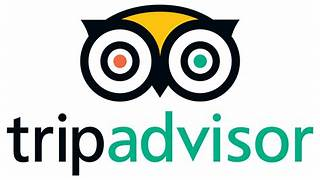

# Sommaire

## I. Importation
### 1. Importation des bibliothèques
### 2. Importation du fichier

## II. Exploration du fichier

## III. Traitement des données

# 

## I. Importation

### 1. Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import time
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Traitement textes
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Importation du fichier

In [2]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## II. Exploration du fichier

In [3]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<Axes: >

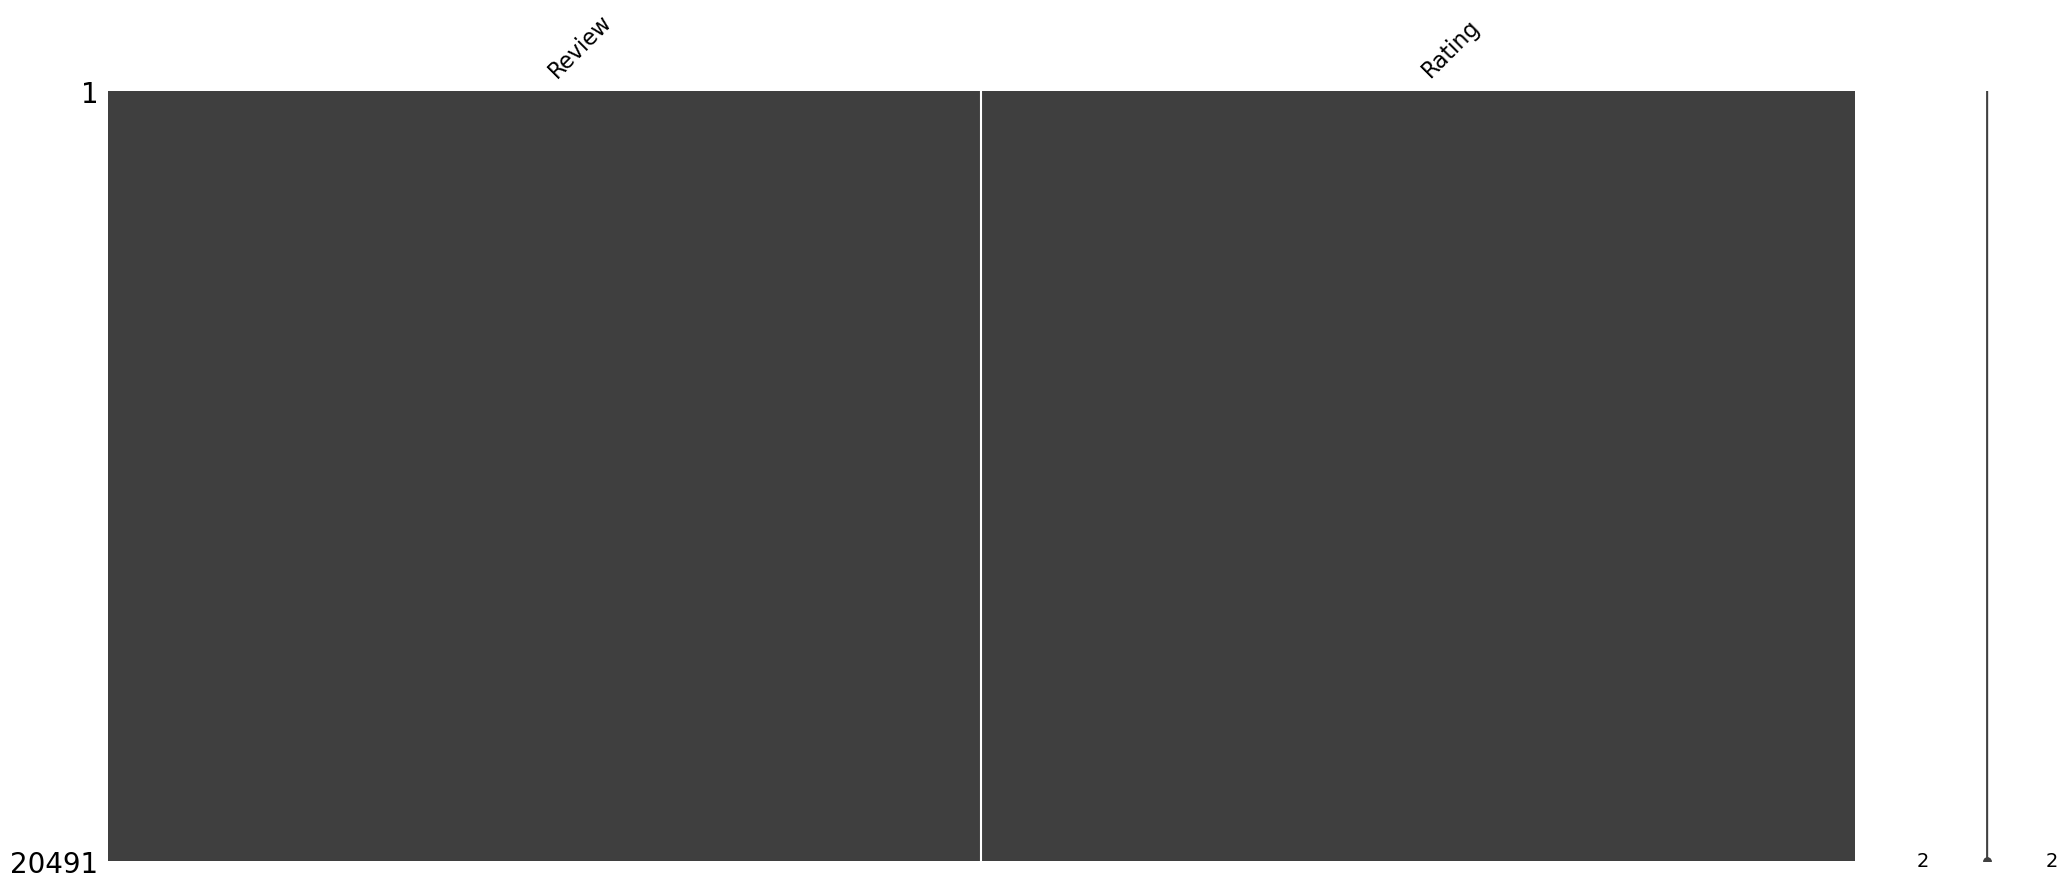

In [4]:
msno.matrix(data)

Nous pouvons constater que notre jeu de données contient 20491 données contenant un commentaire et une note. Nous n'avons pas de valeurs manquantes.

In [5]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

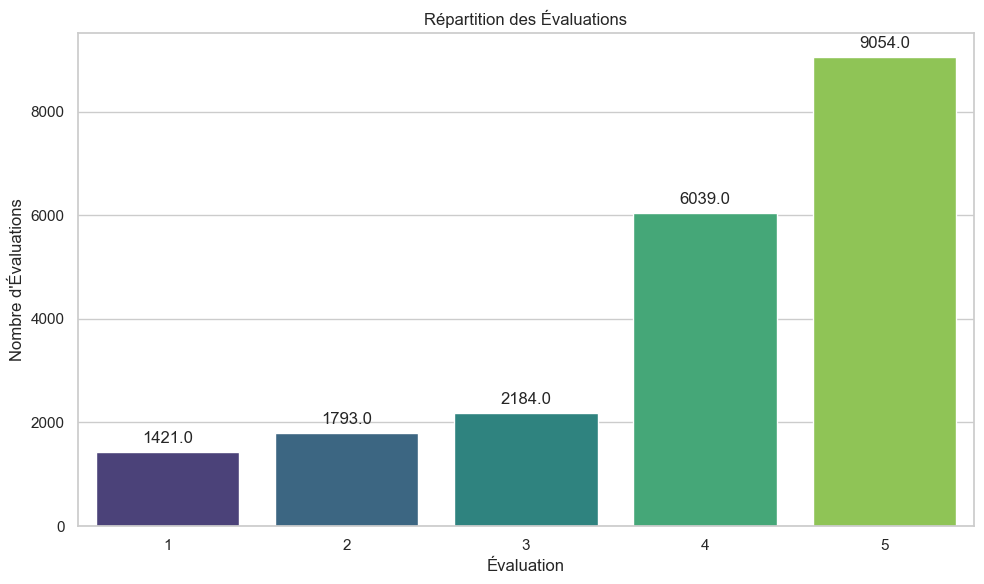

In [6]:
# Comptage des valeurs de la colonne 'Rating'
rating_counts = data['Rating'].value_counts()

# Utilisation de styles Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Création du graphique à barres
rating_plot = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")

# Ajout de titres et d'étiquettes
plt.title("Répartition des Évaluations")
plt.xlabel("Évaluation")
plt.ylabel("Nombre d'Évaluations")

# Ajout des étiquettes pour chaque barre
for p in rating_plot.patches:
    rating_plot.annotate(format(p.get_height()), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')

# Affichage du graphique
plt.tight_layout()
plt.show()


Dans ce premier graphique, nous pouvons remarquer que la forte majorité des gens semblent satisfaits. avec des notes de 4 et 5.

Les clients que l'on peut considérer comme neutre avec une note de 3 mais également les clients insatisfaits présentent une faible présence.

A présent, nous allons procéder à l'étape de l'analyse de la colonne Review.

## III. Traitement des données

Dans cette partie, nous allons effectuer les démarches suivantes : 
- Comptage du nombre de mots et de caractères
- Création d'un WorldCloud
- Création d'un WorldCloud en fonction de la note

###### Comptage de mots


In [7]:
# Comptage du nombre de mots
data['text_len']=data['Review'].apply(lambda x:len(x.split()))

#The below function comes in handy to count the number of characters in a text
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

# Comptage du nombre de caractères
data['text_char_len']=data['Review'].apply(char_count)

data.head(2)

,Review,Rating,text_len,text_char_len
0,nice hotel expensive parking got good deal sta...,4,87,505
1,ok nothing special charge diamond member hilto...,2,250,1438


In [8]:
corpus=[]
    
for x in data['Review'].str.split():
    for i in x:
        corpus.append(i)

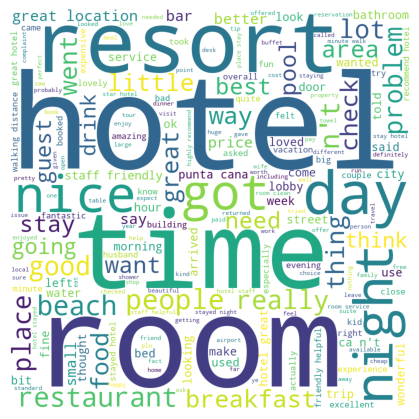

In [9]:
# Concaténer tous les mots dans le corpus
text = ' '.join(corpus)

# Créer un objet WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

# Afficher le WordCloud
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

L'utilisation d'un WorldCloud est très intéressante pour connaître les mots les plus utilisés. Nous allons utiliser cette méthode mais en fonction de la note pour avoir un meilleur retour.

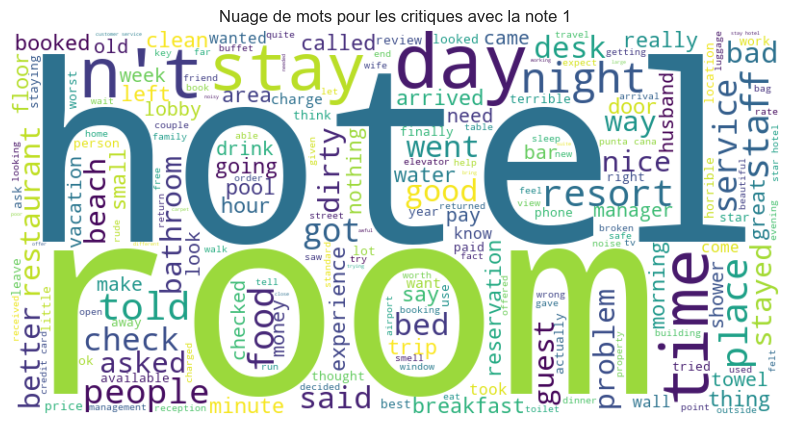

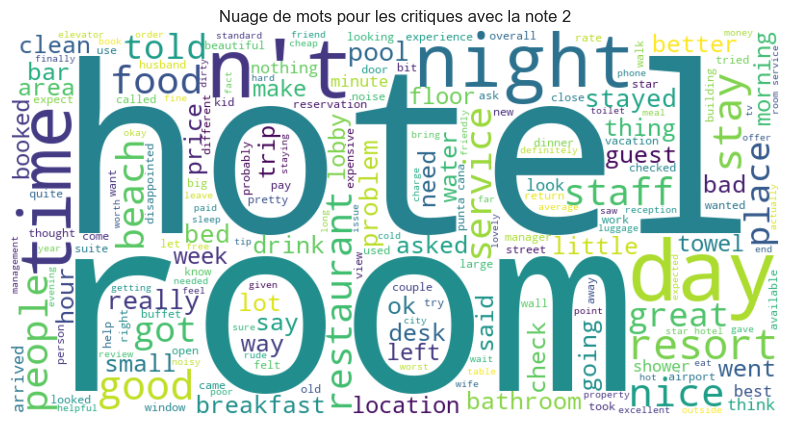

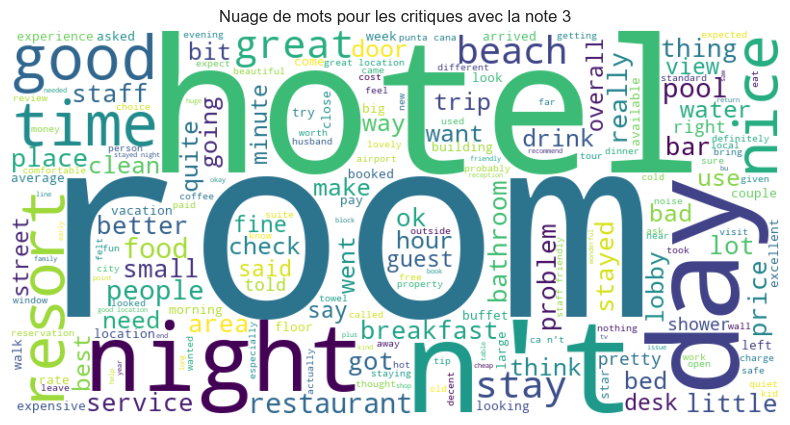

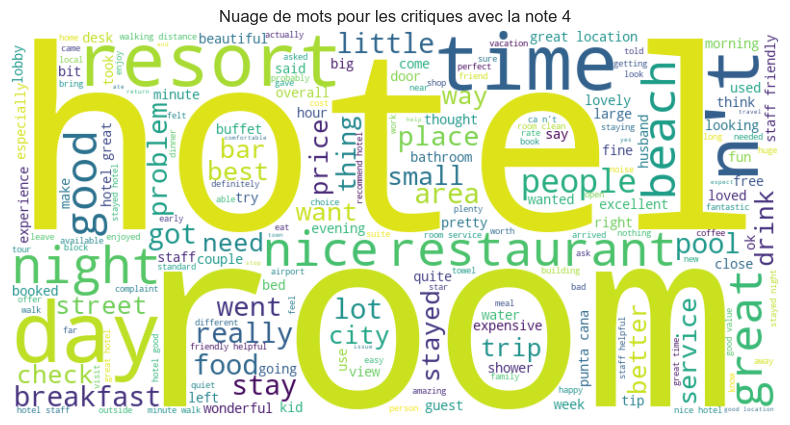

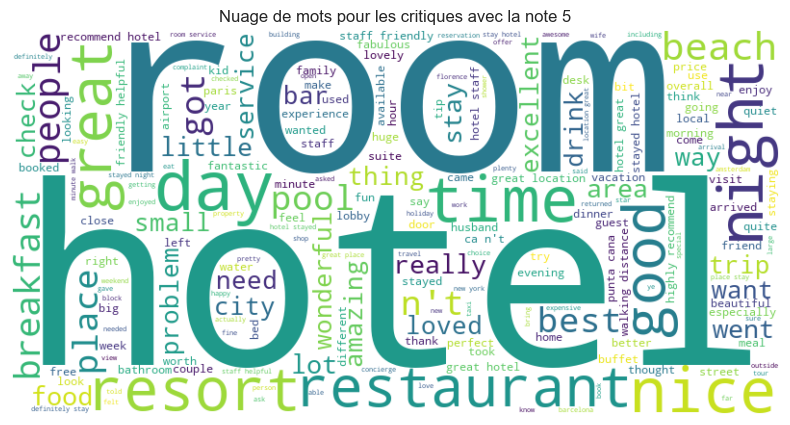

In [10]:
# Grouper les critiques par note
rating_groups = data.groupby('Rating')['Review'].apply(' '.join)

# Créer et afficher les nuages de mots pour chaque groupe de critiques
for rating, reviews in rating_groups.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots pour les critiques avec la note {rating}')
    plt.axis('off')
    plt.show()

###### Tokenization et stopwords

In [11]:
def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Tokenization (division du texte en mots)
    words = nltk.word_tokenize(text)
    
    # Suppression de la ponctuation
    words = [word for word in words if word not in string.punctuation]
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))  # Vous pouvez changer 'english' à votre langue
    words = [word for word in words if word not in stop_words]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Reconstitution du texte à partir des mots prétraités
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Exemple d'utilisation
comment = "This is an example comment with various words and punctuation. It needs preprocessing."
preprocessed_comment = preprocess_text(comment)
print(preprocessed_comment)

# Créez une nouvelle colonne 'PreprocessedReview' pour stocker les commentaires prétraités
data['PreprocessedReview'] = data['Review'].apply(preprocess_text)


example comment various word punctuation need preprocessing


In [12]:
# Comptage du nombre de mots
data['text_len_final']=data['PreprocessedReview'].apply(lambda x:len(x.split()))


def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

# Comptage du nombre de caractères
data['text_char_len_final']=data['PreprocessedReview'].apply(char_count)

data.head(2)

,Review,Rating,text_len,text_char_len,PreprocessedReview,text_len_final,text_char_len_final
0,nice hotel expensive parking got good deal sta...,4,87,505,nice hotel expensive parking got good deal sta...,81,466
1,ok nothing special charge diamond member hilto...,2,250,1438,ok nothing special charge diamond member hilto...,237,1362


In [13]:
# Vérification résultat du traitement

data.describe()

,Rating,text_len,text_char_len,text_len_final,text_char_len_final
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,104.375824,619.521009,100.823727,585.349031
std,1.233030,100.656586,588.732191,96.865830,553.447402
min,1.000000,7.000000,35.000000,6.000000,31.000000
25%,3.000000,48.000000,290.000000,47.000000,275.000000
50%,4.000000,77.000000,459.000000,74.000000,434.000000
75%,5.000000,124.000000,735.000000,119.000000,697.000000
max,5.000000,1931.000000,11569.000000,1887.000000,10944.000000


Notre traitement nous a permis de procéder à une réduction du texte.

Dans le cadre du nombre de mots, nous passons à une moyenne de 104 à 100 et pour les caractères un passage de 619 à 585.

## Conclusion

Au terme de ce projet de Traitement Automatique du Langage Naturel (NLP) dédié à l'analyse des données de notes provenant de TripAdvisor, nous sommes parvenus à extraire des informations inestimables des commentaires des voyageurs.

Exploration des Données : Notre parcours a débuté par une exploration exhaustive des données. Nous avons scruté la distribution des notes, observé les tendances liées à la longueur des avis, et identifié des variations notables en fonction de différentes caractéristiques, telles que les destinations et les types d'hébergement. Cela nous a permis de mieux comprendre la dynamique des avis sur cette plateforme.

Traitement des Données : Le traitement rigoureux des données a été essentiel pour obtenir des résultats significatifs. En appliquant des techniques telles que le comptage de mots et de caractères, la lemmatisation, et la suppression des stopwords, nous avons préparé nos données de manière à ce qu'elles révèlent leur véritable potentiel analytique.

Résultats et Connaissances : Grâce à notre travail, nous avons pu mettre en lumière des constatations intrigantes. Par exemple, nous avons découvert que la longueur des avis ne correspond pas nécessairement aux notes attribuées, indiquant une diversité dans la façon dont les voyageurs s'expriment. De plus, nous avons dévoilé des variations distinctes dans les mots clés les plus courants en fonction des destinations, ouvrant ainsi des possibilités pour des stratégies marketing plus ciblées.